In [ ]:
# Install all necessary packages here

# !pip uninstall pandas
# !pip install pandas==1.1.5
!pip install pyLDAvis
!pip install pyLDAvis.gensim
# !pip install bokeh
# !pip install gensim
# !pip install spacy
!pip install logging
# !pip install wordcloud
# !pip install nltk
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm
# !pip install -U seaborn
# !pip install translators --upgrade
# !pip install --upgrade pip

     |████████████████████████████████| 1.7 MB 27.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 59 kB/s 
     |████████████████████████████████| 11.3 MB 76.1 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=fe40f2fbdd9dfbb5064868f6e6c426d0ddd046a30d3113ab34a904860cc70128
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take int

ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim
     |████████████████████████████████| 96 kB 5.7 MB/s 
ERROR: Could not find a version that satisfies the requirement logging (from versions: 0.4.9.6)
ERROR: No matching distribution found for logging
     |████████████████████████████████| 1.7 MB 25.3 MB/s 
  Using cached setuptools-58.5.3-py3-none-any.whl (946 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires panda

     |████████████████████████████████| 6.0 MB 32.3 MB/s            
     |████████████████████████████████| 42 kB 1.8 MB/s             
     |████████████████████████████████| 10.1 MB 52.3 MB/s            
     |████████████████████████████████| 181 kB 54.8 MB/s            
     |████████████████████████████████| 628 kB 42.2 MB/s            
     |████████████████████████████████| 451 kB 50.6 MB/s            
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully un

In [ ]:
# Import all necessary packages here

import sys
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
import nltk

# Set stopwords package to english and add common stopwords
# will need to revisit later when more words are identified

nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 'co'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Import csv with twitter data

df = pd.read_csv('/content/drive/MyDrive/Data/tw_tweets_users_media_places.csv')

print(df.shape)
df.head()

(534, 34)


,tweet_id,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,likes,quotes,referenced_tweet_count,replies,reply_settings,retweets,source,terms,username,created_at_author,followers_count,following_count,tweet_count,listed_count,location,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type
0,1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,14,0,0,8,everyone,0,Twitter for Android,covid%20autism,MacRaeLady,2012-10-27T02:37:45.000Z,2709,4999,96,15,"Victoria, BC",False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city
1,1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,7,0,0,0,everyone,0,Twitter for iPhone,covid%20autism,zoebarratt1,2014-02-18T21:25:52.000Z,140,735,99,0,"Hessay, York",False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city
2,1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,49,1,0,0,everyone,20,Twitter for iPhone,covid-19%20autistic,SteveHardyLDN,2012-01-02T10:40:18.000Z,7510,7260,100,103,"Maidstone, South East",False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city
3,1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,3,0,0,0,everyone,1,Twitter for iPhone,coronavirus%20autism,SteveHardyLDN,2012-01-02T10:40:18.000Z,7510,7260,100,103,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city
4,1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,15,2,0,0,everyone,21,Twitter for iPhone,coronavirus%20autism,SteveHardyLDN,2012-01-02T10:40:18.000Z,7510,7260,100,103,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city


In [ ]:
# Remove line breaks, single quotes, double quotes, email 
# addresses, and tokenize each string. 

def sent_to_words(sentences):
  for sent in sentences:
    sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
    sent = re.sub('\s+', ' ', sent)  # remove newline chars
    sent = re.sub("\'", "", sent)  # remove single quotes
    sent = re.sub("\"", "", sent)  # remove double quotes
    sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
    yield(sent)  

# Convert each tweet to a list of cleaned words and add to a master list
data = df.text.values.tolist()
data_words = list(sent_to_words(data))
for tweet in data_words[:5]: # print the first :n tweet word lists
  print(tweet)

['this', 'was', 'my', 'grandson', 'this', 'morning', 'autism', 'apparently', 'he', 'is', 'going', 'through', 'bout', 'of', 'bronchitis', 'amp', 'pneumonia', 'he', 'always', 'gets', 'it', 'every', 'year', 'my', 'daughter', 'said', 'that', 'she', 'is', 'sure', 'she', 'will', 'have', 'to', 'take', 'him', 'to', 'the', 'hospital', 'tonight', 'but', 'if', 'they', 'try', 'to', 'test', 'him', 'for', 'covid', 'she', 'will', 'walk', 'out', 'https', 'co', 'krqjit']
['wow', 'been', 'into', 'york', 'for', 'the', 'first', 'time', 'since', 'christmas', 'shopping', 'in', 'dec', 'took', 'our', 'daughter', 'cerys', 'to', 'the', 'catcafe', 'to', 'celebrate', 'her', 'th', 'birthday', 'perfectly', 'relaxed', 'quiet', 'covid', 'unfriendly', 'and', 'autism', 'friendly', 'she', 'was', 'in', 'her', 'happy', 'place', 'https', 'co', 'qzck', 'fze']
['sad', 'number', 'of', 'ppl', 'who', 'lost', 'life', 'due', 'to', 'covid', 'is', 'far', 'more', 'than', 'the', 'number', 'that', 'it', 'says', 'on', 'the', 'news', 't

In [ ]:
# Build bigram and trigram models. 

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Remove Stopwords, form Bigrams, Trigrams, and perform Lemmatization (converting words to base form). 

def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
  """Remove Stopwords, Form Bigrams, Trigrams and perform Lemmatization"""
  texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
  texts = [bigram_mod[doc] for doc in texts]
  texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
  
  for tweet in texts[:3]:
    print(tweet)

  texts_out = []
  nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])    # Load spacy
      
  for sent in texts:
    doc = nlp(" ".join(sent)) 
    texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        
  # remove stopwords once more after lemmatization
  texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
  return texts_out
  
data_ready = process_words(data_words)  # processed Text Data
for tweet in data_ready[:3]:
  print(tweet)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['grandson', 'morning', 'autism', 'apparently', 'going', 'bout', 'bronchitis', 'amp', 'pneumonia', 'always', 'gets', 'every', 'year', 'daughter', 'said', 'sure', 'take', 'hospital', 'tonight', 'try', 'test', 'covid', 'walk', 'https', 'krqjit']
['wow', 'york', 'first', 'time', 'since', 'christmas', 'shopping', 'dec', 'took', 'daughter', 'cerys', 'catcafe', 'celebrate', 'th', 'birthday', 'perfectly', 'relaxed', 'quiet', 'covid', 'unfriendly', 'autism', 'friendly', 'happy', 'place', 'https', 'qzck', 'fze']
['sad', 'number', 'ppl', 'lost', 'life', 'due', 'covid', 'far', 'number', 'says', 'news', 'pass', 'away', 'care', 'homes', 'supported', 'living', 'community', 'counted', 'give', 'thought', 'autistic', 'people', 'amp', 'learning_disabilities', 'every', 'life', 'matters', 'https', 'jj', 'bqeupxe']
['grandson', 'morning', 'autism', 'apparently', 'go', 'bout', 'always', 'get', 'year', 'daughter', 'say', 'take', 'hospital', 'tonight', 'try', 'test', 'covid', 'walk']
['first', 'time', 'shoppi

In [ ]:
# Create a dictionary and courpus and build a LDA model

id2word = corpora.Dictionary(data_ready)
        
corpus = [id2word.doc2bow(text) for text in data_ready]

topics = 4

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=topics,
                                            random_state=12345,
                                            chunksize=20,
                                            passes=10,
                                            per_word_topics=True)

# Print out the topic weights for the 10 most important words in each topic.

ldatopics = lda_model.show_topics(formatted=False)
pprint(lda_model.print_topics())

[(0,
  '0.029*"lockdown" + 0.026*"get" + 0.026*"go" + 0.024*"autism" + 0.018*"make" '
  '+ 0.014*"autistic" + 0.014*"year" + 0.010*"covid" + 0.010*"take" + '
  '0.010*"look"'),
 (1,
  '0.038*"autism" + 0.027*"coronavirus" + 0.025*"today" + 0.023*"child" + '
  '0.020*"quarantine" + 0.014*"want" + 0.010*"sensory" + 0.010*"learn" + '
  '0.009*"https" + 0.009*"overload"'),
 (2,
  '0.036*"autism" + 0.025*"pandemic" + 0.024*"day" + 0.022*"awareness" + '
  '0.018*"son" + 0.015*"month" + 0.012*"covid" + 0.012*"see" + 0.011*"school" '
  '+ 0.010*"friend"'),
 (3,
  '0.032*"autism" + 0.028*"autistic" + 0.025*"people" + 0.017*"support" + '
  '0.016*"amp" + 0.016*"covid" + 0.016*"help" + 0.012*"time" + 0.010*"need" + '
  '0.009*"family"')]


In [ ]:
# Generate LDA models for n = 3 through 9 topics and compare their perplexity 
# and coherence scores.

# Perplexity and Coherence
df_fit = pd.DataFrame(columns=['topics', 'perplexity', 'coherence'])

for n in range(3, 10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=n,
                                            random_state=12345,
                                            chunksize=20,
                                            passes=10,
                                            per_word_topics=True)
  
  # Generate fit metrics
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
  # Add metrics to df_fit
  df_fit.loc[n - 3] = [n, round(lda_model.log_perplexity(corpus), 3), round(coherence_model_lda.get_coherence(), 3)]

df_fit

,topics,perplexity,coherence
0,3.0,-7.700,0.243
1,4.0,-7.875,0.303
2,5.0,-7.996,0.366
3,6.0,-8.091,0.350
4,7.0,-8.154,0.390
5,8.0,-8.238,0.444
6,9.0,-8.242,0.444


In [ ]:
# Compare the perplexity and coherence scores.
# The number of topics with the greatest difference is best

df_fit['diff'] = df_fit.coherence - df_fit.perplexity
df_fit

,topics,perplexity,coherence,diff
0,3.0,-7.700,0.243,7.943
1,4.0,-7.875,0.303,8.178
2,5.0,-7.996,0.366,8.362
3,6.0,-8.091,0.350,8.441
4,7.0,-8.154,0.390,8.544
5,8.0,-8.238,0.444,8.682
6,9.0,-8.242,0.444,8.686


In [ ]:
# Generate new features (one for each topic) and then generate a 
# topic score for every document

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                            id2word=id2word, 
                                            num_topics=5, 
                                            random_state=12345,
                                            chunksize=20, 
                                            passes=10,
                                            per_word_topics=True)

num_topics = len(lda_model.get_topics()) # store the number of topics from the last model
for col in range(num_topics): # generate a new column for each topic
  df[f'topic_{col + 1}'] = 0.0
  
# Store the topic score and dominant topic
for i, words in enumerate(data_ready):
  doc = lda_model[id2word.doc2bow(words)] # generate a corpus for this document set of words
  
  for j, score in enumerate(doc[0]): # for each document in the corpus
    # Get the topic score and store it in the appropriate column
    df.iat[i, (len(df.columns) - ((num_topics) - score[0]))] = score[1]

df_scores = df.copy()
df_scores.head()

,tweet_id,text,context_annotations_count,count_annotations,count_cashtags,count_hashtags,count_mentions,count_urls,created_at_tweet,lang,likes,quotes,referenced_tweet_count,replies,reply_settings,retweets,source,terms,username,created_at_author,followers_count,following_count,tweet_count,listed_count,location,protected,verified,media_type,height,width,preview_image_url,country,name_place,place_type,topic_1,topic_2,topic_3,topic_4,topic_5
0,1440484799970304000,This was my grandson this morning (w/autism)! ...,1,0.0,0.0,0.0,0.0,1.0,2021-09-22T01:15:13.000Z,en,14,0,0,8,everyone,0,Twitter for Android,covid%20autism,MacRaeLady,2012-10-27T02:37:45.000Z,2709,4999,96,15,"Victoria, BC",False,False,photo,405,813,https://pbs.twimg.com/media/E_2hSs4UcAAIOK5.jpg,Canada,Langford,city,0.881014,0.087273,0.010544,0.010585,0.010584
1,1439618825171963904,Wow!! Been into #York for the first time since...,2,2.0,0.0,3.0,0.0,1.0,2021-09-19T15:54:09.000Z,en,7,0,0,0,everyone,0,Twitter for iPhone,covid%20autism,zoebarratt1,2014-02-18T21:25:52.000Z,140,735,99,0,"Hessay, York",False,False,photo,2048,1536,https://pbs.twimg.com/media/E_qNsE1X0AQmoK_.jpg,United Kingdom,Hessay,city,0.177727,0.155541,0.010063,0.646577,0.010093
2,1248872872837332992,Sad number of ppl who lost life due to covid-1...,3,0.0,0.0,0.0,0.0,1.0,2020-04-11T07:17:50.000Z,en,49,1,0,0,everyone,20,Twitter for iPhone,covid-19%20autistic,SteveHardyLDN,2012-01-02T10:40:18.000Z,7510,7260,100,103,"Maidstone, South East",False,False,photo,288,278,https://pbs.twimg.com/media/EVTjQcoXsAAlrfq.jpg,United Kingdom,Maidstone,city,0.312007,0.047999,0.000000,0.625127,0.000000
3,1250729294051053568,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-16T10:14:35.000Z,en,3,0,0,0,everyone,1,Twitter for iPhone,coronavirus%20autism,SteveHardyLDN,2012-01-02T10:40:18.000Z,7510,7260,100,103,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVt7pYTXkAMGzxj.jpg,United Kingdom,Maidstone,city,0.015433,0.223537,0.729794,0.015621,0.015616
4,1249612131433095168,Webinar now available‘Staying healthy at home ...,1,2.0,0.0,3.0,0.0,2.0,2020-04-13T08:15:23.000Z,en,15,2,0,0,everyone,21,Twitter for iPhone,coronavirus%20autism,SteveHardyLDN,2012-01-02T10:40:18.000Z,7510,7260,100,103,"Maidstone, South East",False,False,photo,2048,2048,https://pbs.twimg.com/media/EVeDlp7X0AMuN6X.jpg,United Kingdom,Maidstone,city,0.016706,0.232898,0.716543,0.016935,0.016917


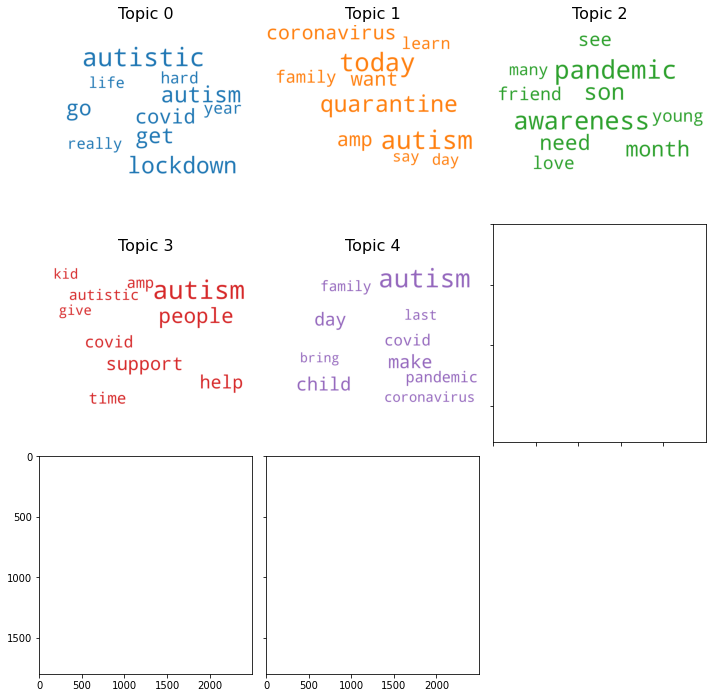

In [ ]:
# Create a Wordcloud of Top N words in each topic

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] 

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    try:
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
      plt.gca().axis('off')
    except:
      continue

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

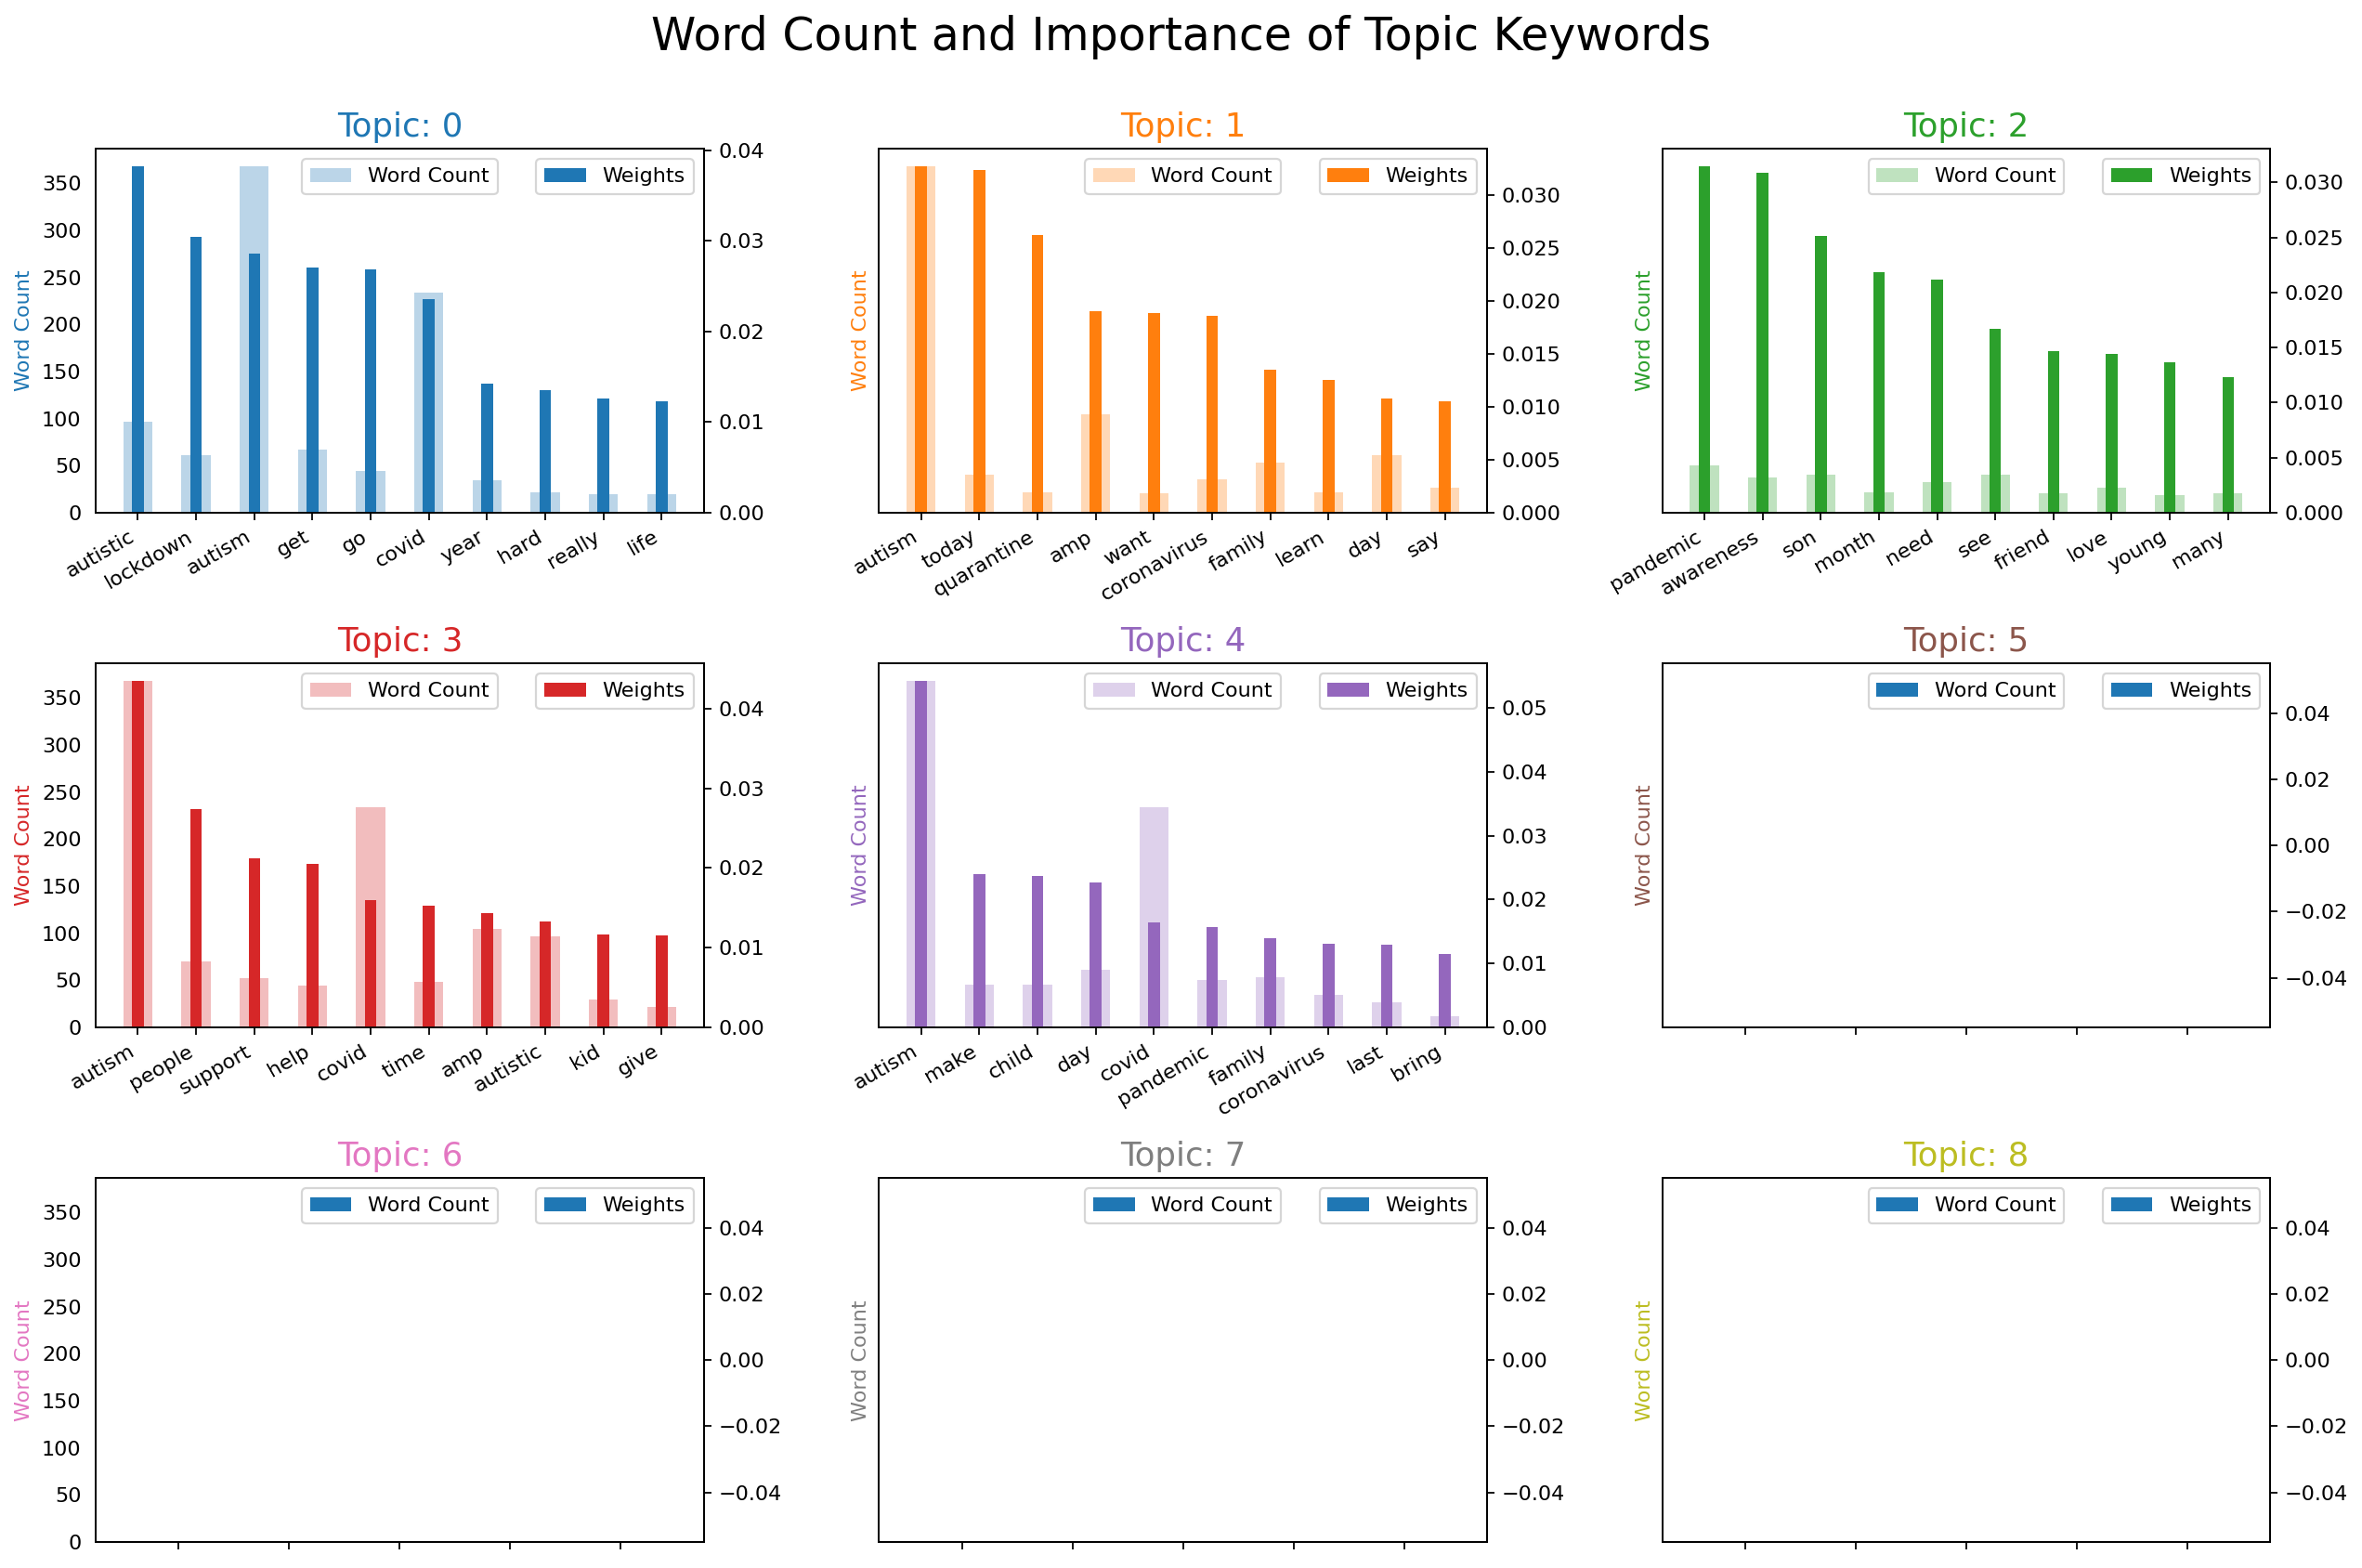

In [ ]:
# Create a bar chart of word counts for each topic
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 3, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    # ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper center'); ax_twin.legend(loc='upper right')

# Use the plot to identify words that should be added to the stopwords

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [ ]:
# Visualize the number of documents/tweets attributed to each topic with
# a t-distributed Stochastic Neighbor Embedding (SNE) chart. 

from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 508 samples in 0.001s...
[t-SNE] Computed neighbors for 508 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 508 / 508
[t-SNE] Mean sigma: 0.135179
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.432922
[t-SNE] KL divergence after 1000 iterations: 0.452146


In [ ]:
# Create an interactive visualization with pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  token_table['Freq'] = token_table['Freq'].round()
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:303: SettingWit

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.167542 -0.034842       1        1  23.693715
0      0.088664 -0.140856       2        1  23.277382
4     -0.030450  0.137353       3        1  20.880276
2     -0.219022 -0.107247       4        1  17.439659
1     -0.006734  0.145591       5        1  14.708967, topic_info=           Term       Freq       Total Category  logprob  loglift
34     autistic  96.000000   96.000000  Default  30.0000  30.0000
136    lockdown  56.000000   56.000000  Default  29.0000  29.0000
956   awareness  43.000000   43.000000  Default  28.0000  28.0000
542    pandemic  70.000000   70.000000  Default  27.0000  27.0000
127       today  38.000000   38.000000  Default  26.0000  26.0000
...         ...        ...         ...      ...      ...      ...
2493     shower   7.191173    9.504562   Topic5  -5.0925   1.6378
172      family  15.861753   39.423081   Topic5  -4.3014   1.0063
2        autism  38.347599  263.484587   Topic5  -3.4187  -0.0106
116         day  12.675690   50.723587   Topic5  -4.5257   0.5300
2479      stuff   6.670728    9.485979   Topic5  -5.1676   1.5646

[222 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1394      3  0.936082     able
2171      4  0.839610  address
33        1  0.543615      amp
33        5  0.442945      amp
673       4  0.873290  anxiety
...     ...       ...      ...
216       3  0.092614     work
445       1  0.977943    world
666       4  0.920612    worry
17        2  0.962157     year
300       4  0.972411    young

[208 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 3, 2])